# Transformers Architecture

- RNNs struggle with vanishing gradients, making it hard to learn long-term dependencies.
- GRUs and LSTMs improve this with gates that control the flow of information, but add computational complexity.
- They are sequential, meaning each step depends on the previous one. We can't compute output at time step t without step t-1, which limits parallelization.

## Transfomers: A Parallell approach

- Uses attention with CNN style of processing
    1. Self-Attention (Computes representations for all words of the sequence in paralell)
    2. Multi-head Attention (Runs multiple self-attention mechanisms in parallel "heads" to learn different types of relationships between words)



## Self-Attention 

- For each word in a sentence, we compute a new representation using attention over all other words.

**Example:**  
_"Jane visite Afrique en septembre"_

We compute attention-based vectors:

- A¹ (Jane)  
- A² (visite)  
- A³ (Afrique)  
- A⁴ (en)  
- A⁵ (septembre)

The word **"Afrique"** can be represented with a static word embedding, but its **meaning changes depending on context**.  
Self-attention helps build a context-aware representation.


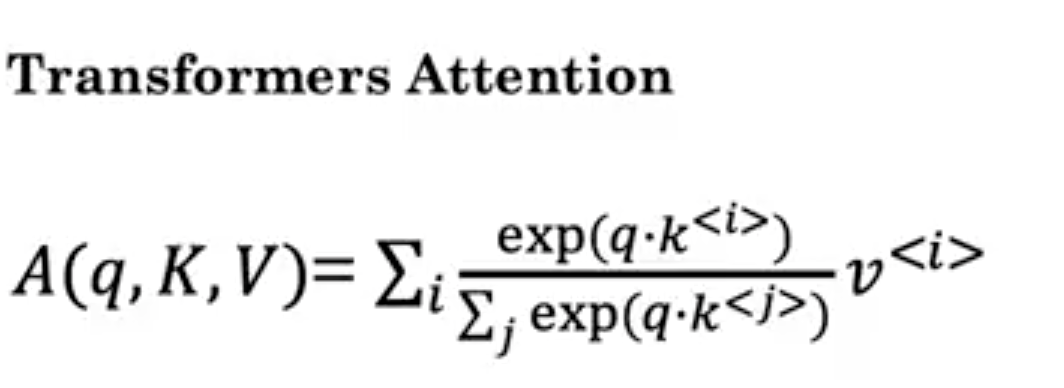


### How to Calculate A³ (for "Afrique")?

Each word is transformed into three vectors using learned weight matrices:

- **Query**:      `q³ = Wᵠ · x³`  
- **Key**:       `k³ = Wᵏ · x³`  
- **Value**:     `v³ = Wᵛ · x³`

Where:

- `Wᵠ`, `Wᵏ`, `Wᵛ` are learnable matrices
- `x³` is the original embedding of the word "Afrique"

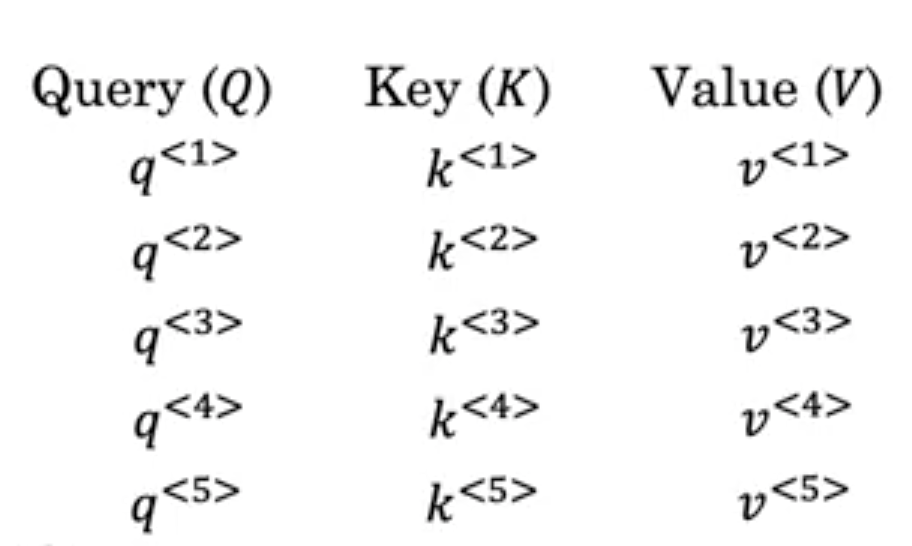

Q represents a query about the word. For instance - "What is happening in Africa?"
K represents the quality of a word given a Query (how good it represents)
V ...representations of words given Q


### Step-by-Step:

1. Compute dot products between `q³` and every `kᵗ` in the sequence (i.e., `q³ · k¹`, `q³ · k²`, ...).  
   - evaluate how good a word is as an answer to the query.
   - Measures **how much attention** "Afrique" should pay to each word.
   - In this case probably q^3 . k ^2 would have largest value because its the action in africa "vesite"

2. Apply **softmax** to these dot products to get attention weights.

3. Multiply each **value vector `vᵗ`** by its corresponding attention weight.

4. **Sum all weighted values**  
   → This gives **A³**, the new representation of "Afrique".


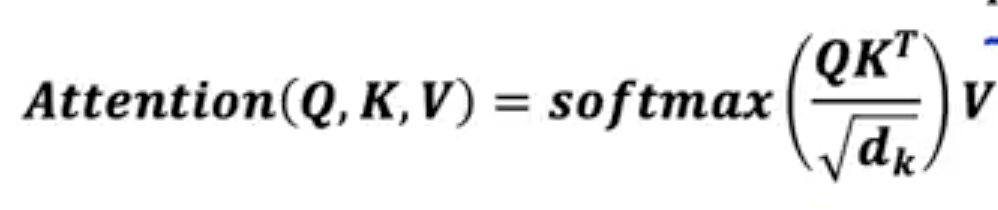

* $Q$ is the matrix of queries 
* $K$ is the matrix of keys
* $V$ is the matrix of values
* $M$ is the optional mask you choose to apply 
* ${d_k}$ is the dimension of the keys, which is used to scale everything down so the softmax doesn't explode


## Multi-Head Attention

-  Computing the self-attention several times to detect different features.
- Basically a paralelizable for loop over the self-attention, to ask other questions Q.
- h = #heads
- For instance, "What is happening?"; "When?"; "Who?", so inner products with other words will be higher.
- And we concatenate the representation of all heads multiplied be a matrix W.

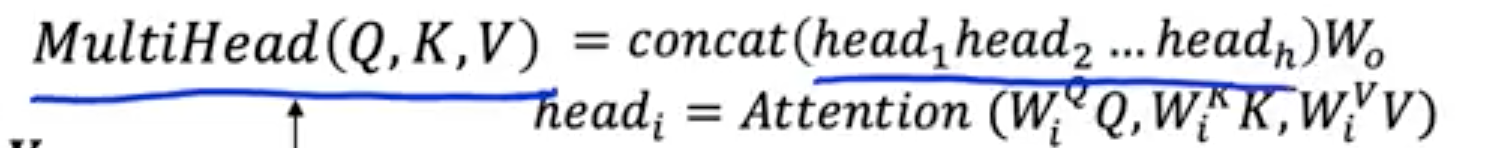




# The Transformer Network

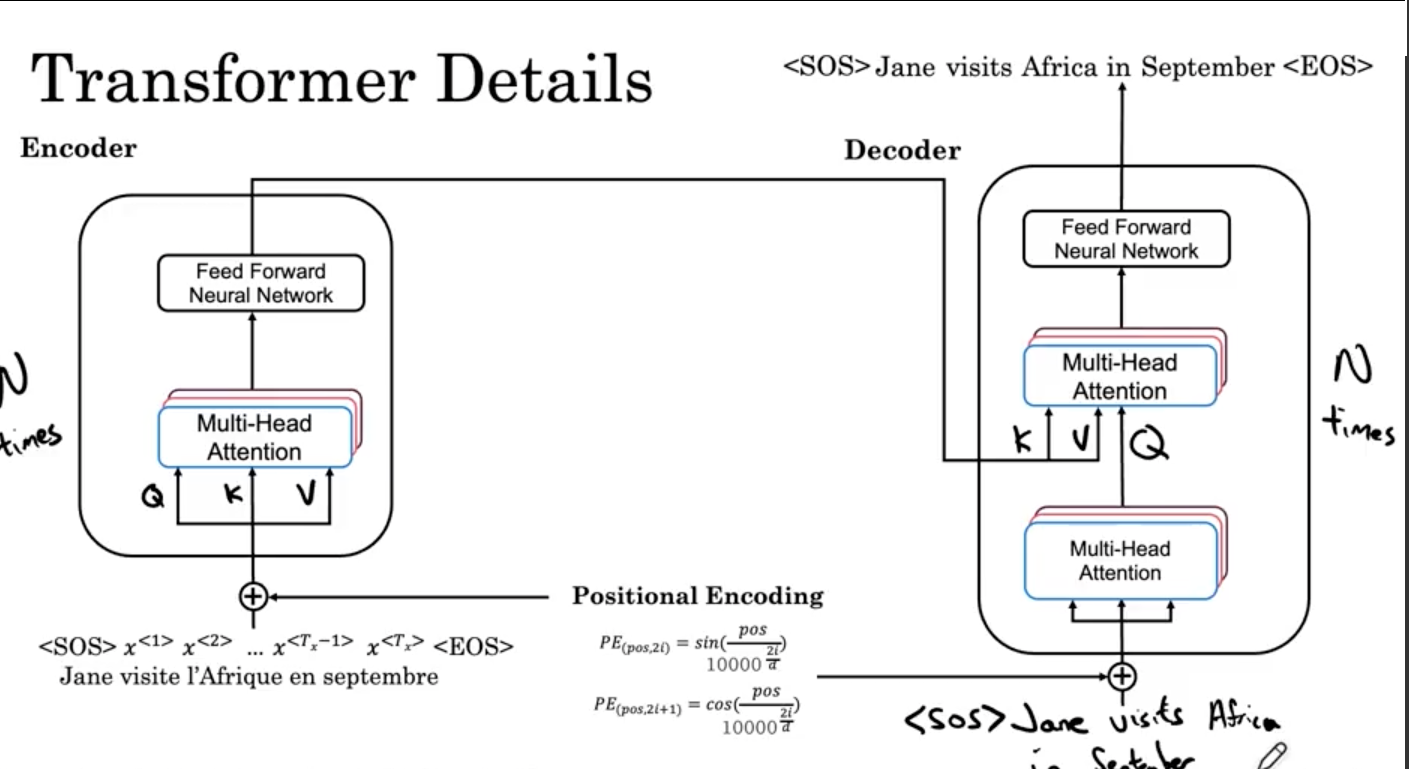



## Encoder


- Input words fed to Encoder with multi-head attention and a feed forward neural network


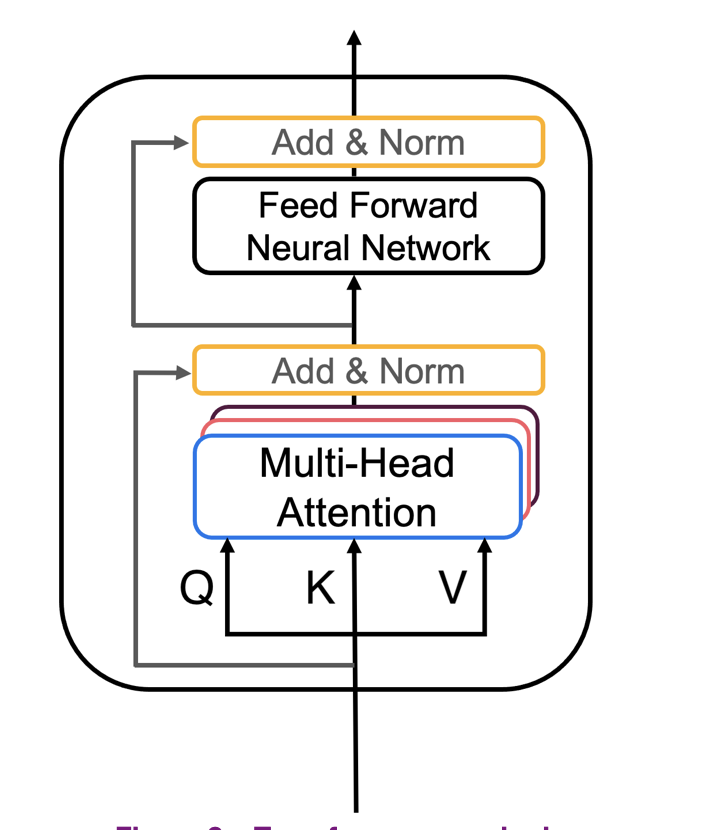

## Decoder


- Decoder block: Goal- translate in English, starting with a Start of sentence SOS
    - A multi-head block generates Q
    - Another multi-head block gets Q  from the multi-head and the k,v from the encoder


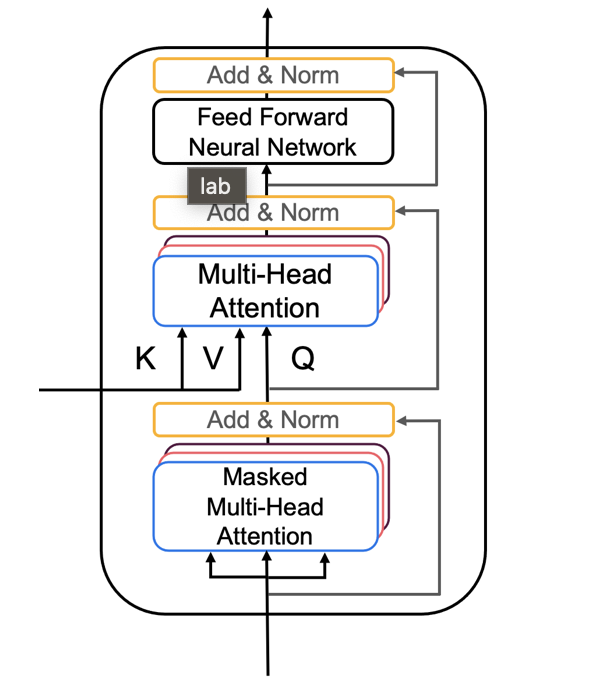




## Positional Encoding

- In Sequence models like RNNs/LSTMS we dont need because we feed inpit in order. Howeever, with trasnformer, all data is fed at once, so it does have information about the order. So we explictly encode the position of the inputs and pass it with sine and cosine formulas:

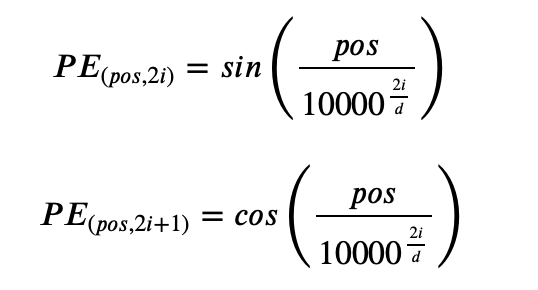


* $d$ is the dimension of the word embedding and positional encoding
* $pos$ is the position of the word.
* $k$ refers to each of the different dimensions in the positional encodings, with $i$ equal to $k$ $//$ $2$.

We cant add just [1,2,3,4,5,...,n], because this would push embeddings in weird directions, affecting the meanings of embeddings. The values of the sine and cosine equations are small enough (between -1 and 1) that when you add the positional encoding to a word embedding, the word embedding is not significantly distorted, and is instead enriched with positional information.

Input = Word Embedding + Positional Encoding

## Look-ahead multi head mask

In training, you will have access to the complete correct output of your training example. The look-ahead mask helps your model pretend that it correctly predicted a part of the output and see if, without looking ahead, it can correctly predict the next output.

For example, if the expected correct output is `[1, 2, 3]` and you wanted to see if given that the model correctly predicted the first value it could predict the second value, you would mask out the second and third values. So you would input the masked sequence `[1, -1e9, -1e9]` and see if it could generate `[1, 2, -1e9]`.


## Residual Connetions and Normalization layer 